In [157]:
import numpy as np
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
from scipy.spatial import Delaunay
tri = Delaunay(points)



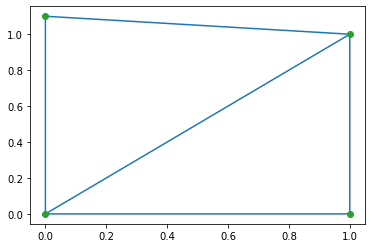

In [158]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()





In [159]:
tri.simplices

array([[2, 3, 0],
       [3, 1, 0]], dtype=int32)

In [160]:
points[tri.simplices]

array([[[1. , 0. ],
        [1. , 1. ],
        [0. , 0. ]],

       [[1. , 1. ],
        [0. , 1.1],
        [0. , 0. ]]])

In [161]:
tri.neighbors[1]

array([-1,  0, -1], dtype=int32)

In [162]:
points[tri.simplices[1,1]]

array([0. , 1.1])

In [163]:
p = np.array([(0.1, 0.2), (1.5, 0.5), (0.5, 1.05)])

In [164]:
tri.find_simplex(p)

array([ 1, -1,  1], dtype=int32)

In [165]:
p_valids = np.array([(0.1, 0.2), (0.5, 1.05)])

In [166]:
tri.simplices[tri.find_simplex(p_valids)]

array([[3, 1, 0],
       [3, 1, 0]], dtype=int32)

In [167]:
b = tri.transform[1,:2].dot(np.transpose(p - tri.transform[1,2]))

In [168]:
np.c_[np.transpose(b), 1 - b.sum(axis=0)]

array([[ 0.1       ,  0.09090909,  0.80909091],
       [ 1.5       , -0.90909091,  0.40909091],
       [ 0.5       ,  0.5       ,  0.        ]])

The above is directly from documentation for scipy
## below is my testing

Generate random points in 3D space

In [169]:
np.random.seed(0)
points = np.random.rand(10, 3)

Plot the points before Delaunay triangulation

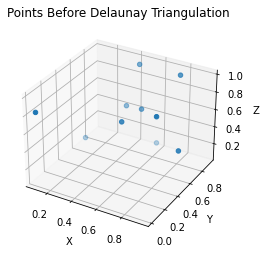

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Points Before Delaunay Triangulation')
plt.show()


Create Delaunay triangulation

In [171]:
tri = Delaunay(points)

Plot the triangulation after Delaunay triangulation

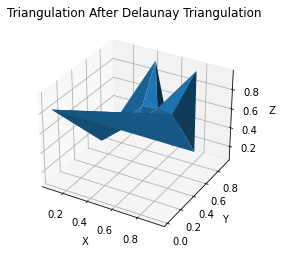

In [172]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=tri.simplices)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Triangulation After Delaunay Triangulation')
plt.show()

Another example of basically the same thing but shorter

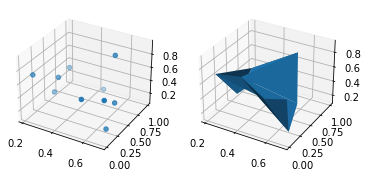

In [173]:

# generate random points in 3D space
points = np.random.rand(10, 3)

# create a triangulation object
tri = Delaunay(points)

# plot points
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# plot Delaunay triangulation
ax = fig.add_subplot(122, projection='3d')
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=tri.simplices)
plt.show()




In [174]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

# Generate random points in 3D space
points = np.random.rand(10, 3)

# Create a triangulation object
tri = Delaunay(points)

print(tri.)

# Plot points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# Plot Delaunay triangulation wireframe
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=tri.simplices, edgecolor='black', linewidth=0.2, alpha=0)

plt.show()

print(tri.neighbors)

SyntaxError: invalid syntax (2543360453.py, line 12)

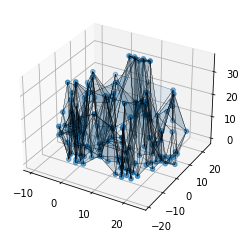

[[ -1  -1  12  38]
 [ -1   2  -1   4]
 [484   1  27   8]
 ...
 [790 811  -1 805]
 [698  -1 810 812]
 [799 811  -1 809]]


In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D

points = np.array([[-1.01112013e+01, 4.53801537e+00,  9.92176064e-11],
 [-9.85474205e+00,  1.32999077e+01,  9.67777157e+00],
 [-9.82251644e+00,  5.26095963e+00,  5.22958851e+00],
 [-9.12595177e+00,  5.82869911e+00,  2.02216578e+00],
 [-8.30577755e+00, -1.17229712e+00,  4.50164318e+00],
 [-8.24184990e+00,  5.32171726e+00,  2.05456400e+00],
 [-8.15239906e+00,  1.08989468e+01,  9.92176064e-11],
 [-8.09585762e+00,  5.27532482e+00,  9.92176064e-11],
 [-7.77597904e+00, -8.12430668e+00,  7.33965302e+00],
 [-7.61839342e+00,  3.23867154e+00,  9.92176064e-11],
 [-7.13910770e+00,  4.71195412e+00,  2.02008152e+00],
 [-7.12084770e+00,  9.07238293e+00,  1.07078600e+01],
 [-6.89106846e+00,  1.76899695e+00,  1.52495518e+01],
 [-6.82407188e+00,  9.54740429e+00,  2.16472321e+01],
 [-6.78763771e+00, -7.02758408e+00,  1.73860073e+01],
 [-6.12275505e+00,  1.18852005e+01,  2.55335255e+01],
 [-6.03636599e+00,  4.10219002e+00,  1.98559880e+00],
 [-5.82071066e+00, -1.95375228e+00,  9.92176064e-11],
 [-5.77044392e+00,  4.23509121e+00,  9.92176064e-11],
 [-5.37110758e+00,  1.70712161e+00,  8.76569653e+00],
 [-5.30952692e+00,  3.70137382e+00,  1.95925725e+00],
 [-5.27198410e+00, -6.32259655e+00,  3.06029243e+01],
 [-5.16552925e+00, -9.54112649e-01,  9.95583344e+00],
 [-5.03740883e+00, -4.14017248e+00,  2.50406265e+01],
 [-4.91221905e+00, -5.79741955e+00,  1.19024477e+01],
 [-4.90221214e+00,  2.48785996e+00,  9.92176064e-11],
 [-4.19296074e+00, -1.46399832e+01,  1.64009705e+01],
 [-3.97114086e+00, -8.50205517e+00,  9.92176064e-11],
 [-3.87188101e+00, -1.02078037e+01,  6.86143923e+00],
 [-3.53032541e+00,  1.78272305e+01,  9.35764503e+00],
 [-3.46107078e+00, -4.68005705e+00,  3.06029243e+01],
 [-3.26006913e+00, -8.74913752e-01,  9.92176133e-11],
 [-3.20590687e+00, -1.49863605e+01,  1.41170874e+01],
 [-3.17084360e+00,  6.96653748e+00,  1.75901375e+01],
 [-3.06477070e+00, -1.10324450e+01,  9.92176064e-11],
 [-3.01483345e+00, -9.44665051e+00,  1.72556496e+00],
 [-2.82546759e+00, -4.40980196e-01,  2.16760254e+01],
 [-2.65183997e+00,  1.88819466e+01,  1.71469669e+01],
 [-2.45992184e+00, -6.70005226e+00,  3.06029243e+01],
 [-2.43415594e+00,  2.01164589e+01,  2.14265995e+01],
 [-2.40975523e+00,  7.00025940e+00,  4.94051218e+00],
 [-2.35371399e+00, -9.92285061e+00,  2.59871750e+01],
 [-2.26301050e+00,  1.26578593e+00,  2.64135761e+01],
 [-2.21161008e+00,  1.62211018e+01,  1.38010025e+01],
 [-2.08453703e+00,  6.85837936e+00,  9.92176064e-11],
 [-2.05430532e+00, -1.48232880e+01,  1.77922821e+01],
 [-1.61254418e+00,  2.61954618e+00,  2.93754692e+01],
 [-1.22143328e+00, -9.94059277e+00,  9.92176064e-11],
 [-1.21193910e+00, -9.26674843e+00,  1.76867318e+00],
 [-1.21101105e+00, -9.97510815e+00,  6.83288336e+00],
 [-1.09120679e+00, -1.22895784e+01,  2.28674927e+01],
 [-9.81697679e-01, -7.00845909e+00,  9.92176064e-11],
 [-6.94820881e-01, -1.24345913e+01,  1.80503578e+01],
 [-6.44563437e-01,  1.60372906e+01,  9.92176064e-11],
 [-5.65291762e-01, -1.14696293e+01,  2.14146385e+01],
 [-4.44685459e-01,  2.78953195e-01,  2.44262543e+01],
 [-4.22247291e-01, -9.90108299e+00,  6.82746983e+00],
 [-3.87021899e-01, -1.17010508e+01,  9.92176064e-11],
 [ 2.32185841e-01, -9.83966541e+00,  6.82297897e+00],
 [ 2.59810925e-01, -9.13308430e+00,  1.79044104e+00],
 [ 2.60753870e-01, -9.91486931e+00,  9.92176064e-11],
 [ 8.79073143e-01,  3.47159600e+00,  9.92176064e-11],
 [ 1.12549329e+00, -9.05446529e+00,  1.80325747e+00],
 [ 1.15935993e+00, -6.53482628e+00,  2.86325035e+01],
 [ 1.70914793e+00, -1.41462936e+01,  1.79372387e+01],
 [ 1.71726322e+00, -1.31633253e+01,  2.12388821e+01],
 [ 1.75328493e+00, -1.65205116e+01,  1.77310352e+01],
 [ 1.77817917e+00, -9.72534657e+00,  6.73978901e+00],
 [ 1.88467216e+00, -1.11565437e+01,  9.92176064e-11],
 [ 1.92894292e+00, -1.39105911e+01,  2.23468037e+01],
 [ 1.92966986e+00, -6.17120743e+00,  3.08911324e+00],
 [ 2.00827789e+00, -6.01699352e+00,  9.92176064e-11],
 [ 3.57683229e+00, -1.78867474e+01,  1.42493362e+01],
 [ 3.58333349e+00, -1.79705238e+01,  1.67136726e+01],
 [ 3.67505741e+00,  1.66518936e+01,  3.36599045e+01],
 [ 4.31257057e+00,  1.97773952e+01,  4.78334618e+00],
 [ 4.32930756e+00, -4.05245352e+00,  9.92176064e-11],
 [ 4.54901600e+00,  1.86746864e+01,  3.25181160e+01],
 [ 4.85958290e+00,  1.48843632e+01,  3.46758118e+01],
 [ 7.10551071e+00, -1.88350658e+01,  1.45770931e+01],
 [ 7.10551071e+00, -1.41091213e+01,  2.59656734e+01],
 [ 7.10551071e+00, -1.10315971e+01,  5.80826569e+00],
 [ 7.10551071e+00, -6.75080967e+00,  2.97719479e+01],
 [ 7.10551071e+00, -5.31307220e+00,  9.92176064e-11],
 [ 7.10551071e+00, -4.91013622e+00,  2.81122894e+01],
 [ 7.10551071e+00, -1.25426722e+00,  2.77104797e+01],
 [ 7.10551071e+00, -9.70966935e-01,  2.51023026e+01],
 [ 7.10551071e+00,  5.86423159e-01,  3.15421391e+01],
 [ 7.10551071e+00,  1.37942371e+01,  3.51906548e+01],
 [ 7.10551071e+00,  1.39216137e+01,  9.92176064e-11],
 [ 7.10551071e+00,  1.63120537e+01,  3.27178993e+01],
 [ 7.10551071e+00,  1.80990658e+01,  1.19751663e+01],
 [ 7.10551071e+00,  1.94617462e+01,  3.21653137e+01],
 [ 7.10551071e+00,  2.02376289e+01,  8.71676350e+00],
 [ 7.10551071e+00,  2.03070469e+01,  5.99915266e+00],
 [ 7.10551071e+00,  2.17186470e+01,  1.60510216e+01],
 [ 7.10551071e+00,  2.33852158e+01,  1.98237534e+01],
 [ 9.35143852e+00,  1.48843632e+01,  3.46758118e+01],
 [ 9.66200542e+00,  1.86746864e+01,  3.25181160e+01],
 [ 9.88171387e+00, -4.05245352e+00,  9.92176064e-11],
 [ 9.89845085e+00,  1.97773952e+01,  4.78334618e+00],
 [ 1.05359640e+01,  1.66518936e+01,  3.36599045e+01],
 [ 1.06276875e+01, -1.79705238e+01,  1.67136726e+01],
 [ 1.06341887e+01, -1.78867474e+01,  1.42493362e+01],
 [ 1.22027435e+01, -6.01699352e+00,  9.92176064e-11],
 [ 1.22813520e+01, -6.17120743e+00,  3.08911324e+00],
 [ 1.22820787e+01, -1.39105911e+01,  2.23468037e+01],
 [ 1.23263493e+01, -1.11565437e+01,  9.92176064e-11],
 [ 1.24328432e+01, -9.72534657e+00,  6.73978901e+00],
 [ 1.24577360e+01, -1.65205116e+01,  1.77310352e+01],
 [ 1.24937582e+01, -1.31633253e+01,  2.12388821e+01],
 [ 1.25018730e+01, -1.41462936e+01,  1.79372387e+01],
 [ 1.30516615e+01, -6.53482628e+00,  2.86325035e+01],
 [ 1.30855284e+01, -9.05446529e+00,  1.80325747e+00],
 [ 1.33319483e+01,  3.47159600e+00,  9.92176064e-11],
 [ 1.39502668e+01, -9.91486931e+00,  9.92176064e-11],
 [ 1.39512100e+01, -9.13308430e+00,  1.79044104e+00],
 [ 1.39788361e+01, -9.83966541e+00,  6.82297897e+00],
 [ 1.45980425e+01, -1.17010508e+01,  9.92176064e-11],
 [ 1.46332693e+01, -9.90108299e+00,  6.82746983e+00],
 [ 1.46557074e+01,  2.78953195e-01,  2.44262543e+01],
 [ 1.47763147e+01, -1.14696293e+01,  2.14146385e+01],
 [ 1.48555861e+01,  1.60372906e+01,  9.92176064e-11],
 [ 1.49058428e+01, -1.24345913e+01,  1.80503578e+01],
 [ 1.51927195e+01, -7.00845909e+00,  9.92176064e-11],
 [ 1.53022280e+01, -1.22895784e+01,  2.28674927e+01],
 [ 1.54220324e+01, -9.97510815e+00,  6.83288336e+00],
 [ 1.54229593e+01, -9.26674843e+00,  1.76867318e+00],
 [ 1.54324541e+01, -9.94059277e+00,  9.92176064e-11],
 [ 1.58235655e+01,  2.61954618e+00,  2.93754692e+01],
 [ 1.62653275e+01, -1.48232880e+01,  1.77922821e+01],
 [ 1.62955589e+01,  6.85837936e+00,  9.92176064e-11],
 [ 1.64226303e+01,  1.62211018e+01,  1.38010025e+01],
 [ 1.64740334e+01,  1.26578593e+00,  2.64135761e+01],
 [ 1.65647354e+01, -9.92285061e+00,  2.59871750e+01],
 [ 1.66207771e+01,  7.00025940e+00,  4.94051218e+00],
 [ 1.66451759e+01,  2.01164589e+01,  2.14265995e+01],
 [ 1.66709442e+01, -6.70005226e+00,  3.06029243e+01],
 [ 1.68628616e+01,  1.88819466e+01,  1.71469669e+01],
 [ 1.70364876e+01, -4.40980196e-01,  2.16760254e+01],
 [ 1.72258530e+01, -9.44665051e+00,  1.72556496e+00],
 [ 1.72757912e+01, -1.10324450e+01,  9.92176064e-11],
 [ 1.73818665e+01,  6.96653748e+00,  1.75901375e+01],
 [ 1.74169273e+01, -1.49863605e+01,  1.41170874e+01],
 [ 1.74710922e+01, -8.74913752e-01,  9.92176133e-11],
 [ 1.76720924e+01, -4.68005705e+00,  3.06029243e+01],
 [ 1.77413483e+01,  1.78272305e+01,  9.35764503e+00],
 [ 1.80829010e+01, -1.02078037e+01,  6.86143923e+00],
 [ 1.81821632e+01, -8.50205517e+00,  9.92176064e-11],
 [ 1.84039803e+01, -1.46399832e+01,  1.64009705e+01],
 [ 1.91132317e+01,  2.48785996e+00,  9.92176064e-11],
 [ 1.91232414e+01, -5.79741955e+00,  1.19024477e+01],
 [ 1.92484322e+01, -4.14017248e+00,  2.50406265e+01],
 [ 1.93765488e+01, -9.54112649e-01,  9.95583344e+00],
 [ 1.94830055e+01, -6.32259655e+00,  3.06029243e+01],
 [ 1.95205460e+01,  3.70137382e+00,  1.95925725e+00],
 [ 1.95821304e+01,  1.70712161e+00,  8.76569653e+00],
 [ 1.99814644e+01,  4.23509121e+00,  9.92176064e-11],
 [ 2.00317307e+01, -1.95375228e+00,  9.92176064e-11],
 [ 2.02473869e+01,  4.10219002e+00,  1.98559880e+00],
 [ 2.03337784e+01,  1.18852005e+01,  2.55335255e+01],
 [ 2.09986610e+01, -7.02758408e+00,  1.73860073e+01],
 [ 2.10350914e+01,  9.54740429e+00,  2.16472321e+01],
 [ 2.11020889e+01,  1.76899695e+00,  1.52495518e+01],
 [ 2.13318672e+01,  9.07238293e+00,  1.07078600e+01],
 [ 2.13501282e+01,  4.71195412e+00,  2.02008152e+00],
 [ 2.18294144e+01,  3.23867154e+00,  9.92176064e-11],
 [ 2.19869995e+01, -8.12430668e+00,  7.33965302e+00],
 [ 2.23068771e+01,  5.27532482e+00,  9.92176064e-11],
 [ 2.23634186e+01,  1.08989468e+01,  9.92176064e-11],
 [ 2.24528732e+01,  5.32171726e+00,  2.05456400e+00],
 [ 2.25167999e+01, -1.17229712e+00,  4.50164318e+00],
 [ 2.33369751e+01,  5.82869911e+00,  2.02216578e+00],
 [ 2.40335388e+01,  5.26095963e+00,  5.22958851e+00],
 [ 2.40657654e+01,  1.32999077e+01,  9.67777157e+00],
 [ 2.43222198e+01,  4.53801537e+00,  9.92176064e-11]])  # your array here

# Create a triangulation object,
tri = Delaunay(points)

# Plot points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# Plot Delaunay triangulation wireframe
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=tri.simplices, edgecolor='black', linewidth=0.2, alpha=0.1)

plt.show()

print(tri.neighbors)
